In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error

region_1 = pd.read_csv('E:/datasets/geo_data_0.csv')
region_2 = pd.read_csv('E:/datasets/geo_data_1.csv')
region_3 = pd.read_csv('E:/datasets/geo_data_2.csv')

In [339]:
# Region 1
print(region_1.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


In [340]:
# Region 2
print(region_2.head())

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


In [341]:
# Region 3
print(region_3.head())

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


#### Region 1

In [342]:
region_1_columns = list(region_1.columns.drop(['id']))
#region_1_columns = list(region_1.columns)[1:]

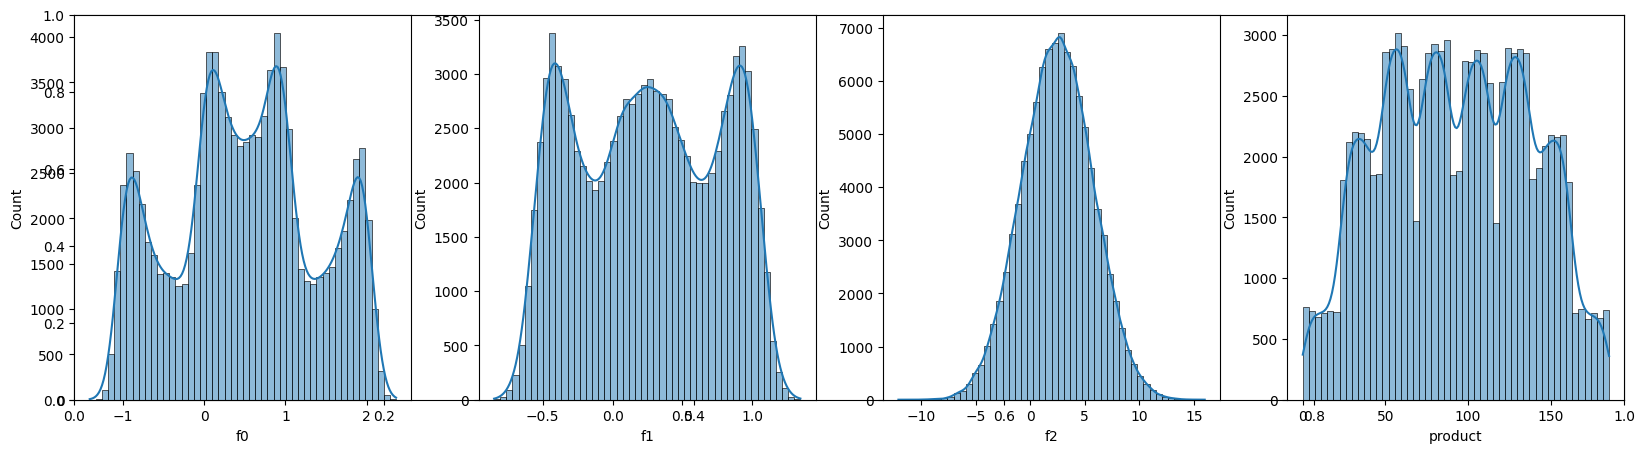

In [343]:
plt.subplots(figsize=(20, 5))

for i in range(len(region_1_columns)):
    sns.histplot(data=region_1, x=region_1_columns[i], ax=plt.subplot(1, len(region_1_columns), i+1), bins=50, kde=True,)
    #plt.xticks(rotation=45)
    

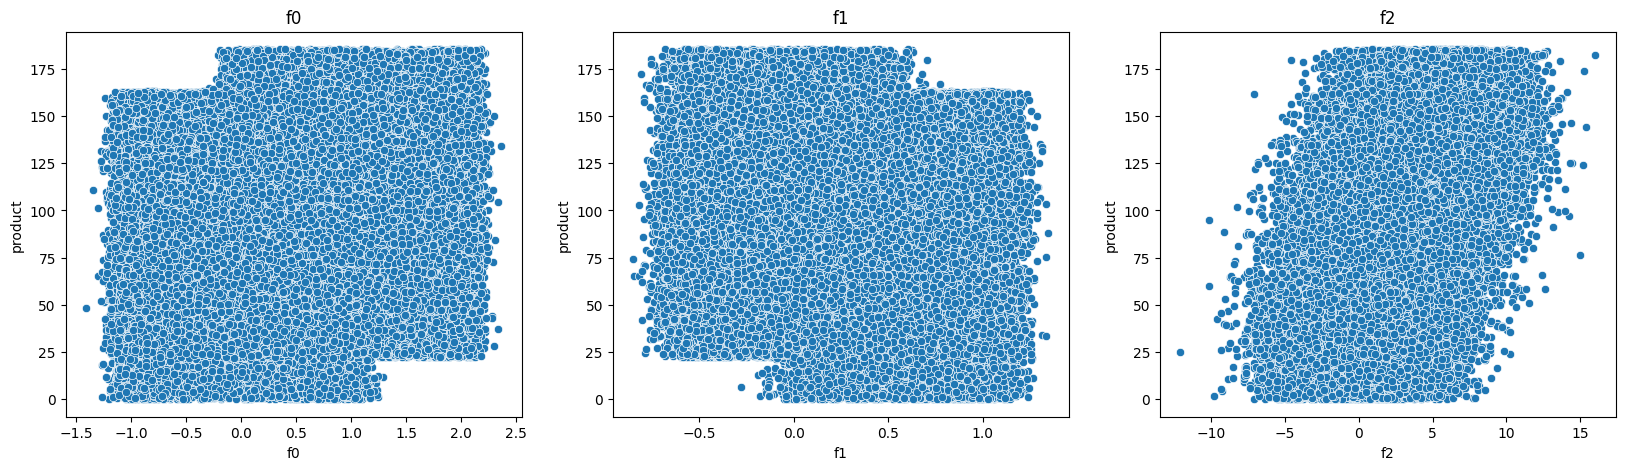

In [344]:
fig, ax = plt.subplots(1, len(region_1_columns)-1, figsize=(20, 5))

for col, axis in zip(region_1_columns[:-1], ax):
    sns.scatterplot(x=region_1[col], y=region_1[region_1_columns[-1]], ax=axis)
    axis.set_title(col)

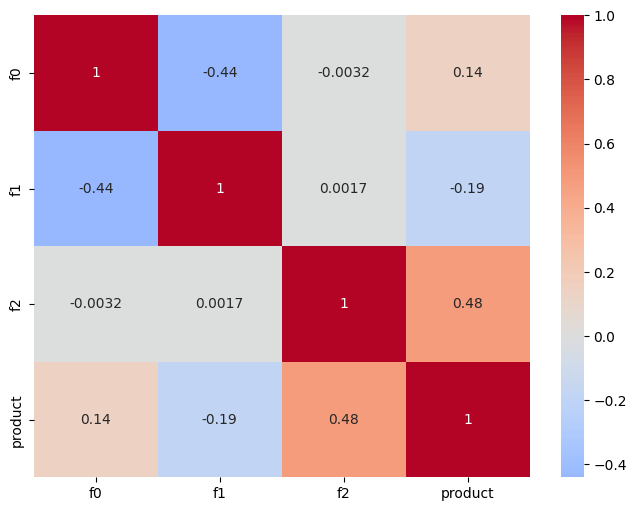

In [345]:
corr_1 = region_1[region_1_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_1, annot=True, cmap="coolwarm", center=0)
plt.show()

#### Region 2

In [346]:
region_2_columns = list(region_2.columns.drop(['id']))

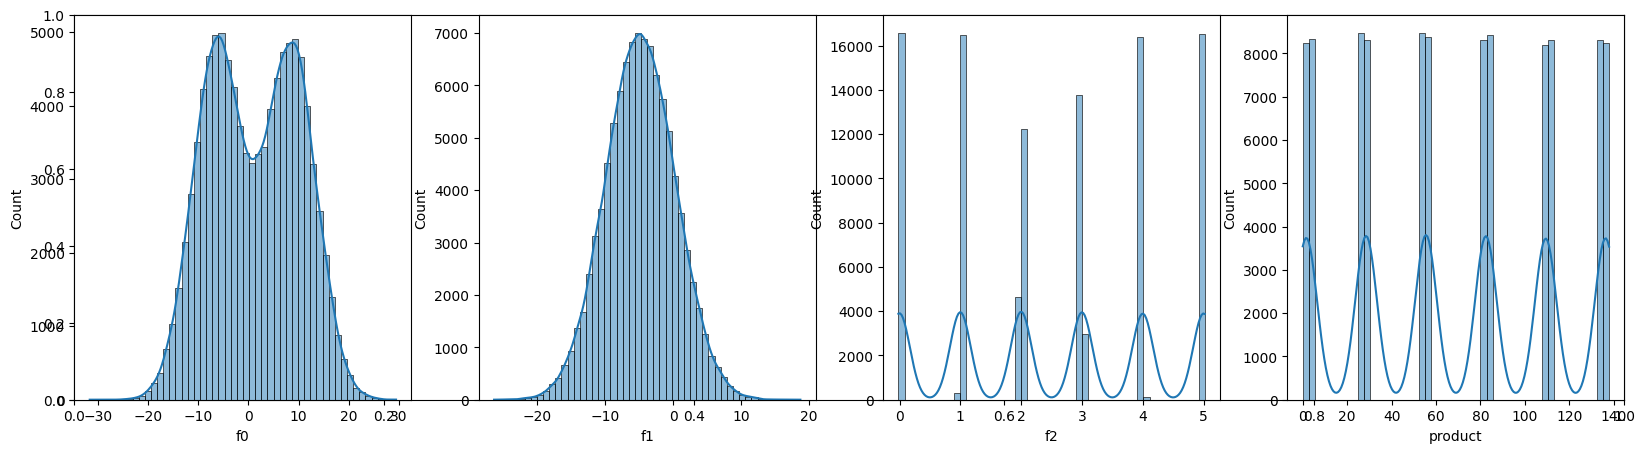

In [347]:
plt.subplots(figsize=(20, 5))

for i in range(len(region_2_columns)):
    sns.histplot(data=region_2, x=region_2_columns[i], ax=plt.subplot(1, len(region_2_columns), i+1), bins=50, kde=True,)
    #plt.xticks(rotation=45)

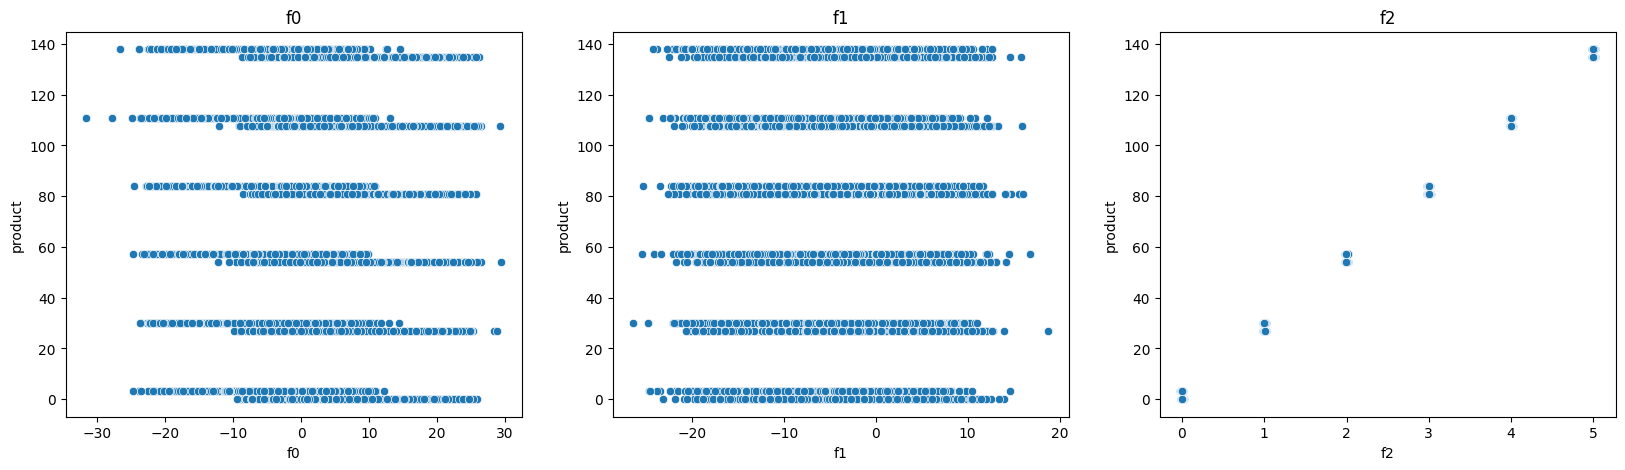

In [348]:
fig, ax = plt.subplots(1, len(region_2_columns)-1, figsize=(20, 5))

for col, axis in zip(region_2_columns[:-1], ax):
    sns.scatterplot(x=region_2[col], y=region_2[region_2_columns[-1]], ax=axis)
    axis.set_title(col)

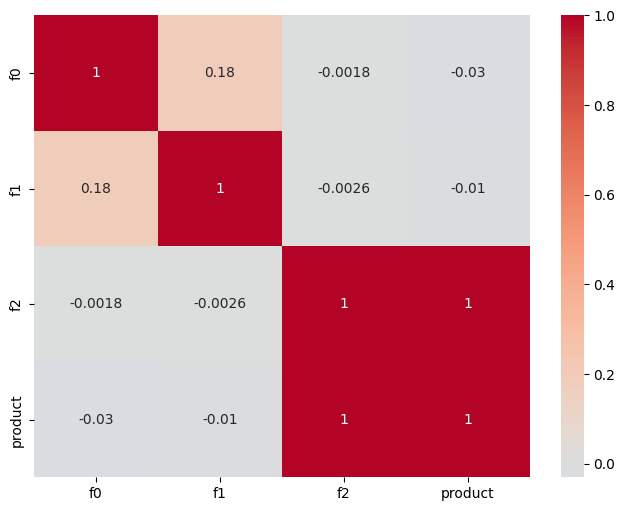

In [349]:
corr_2 = region_2[region_2_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_2, annot=True, cmap="coolwarm", center=0)
plt.show()

#### Region 3

In [350]:
region_3_columns = list(region_3.columns.drop(['id']))

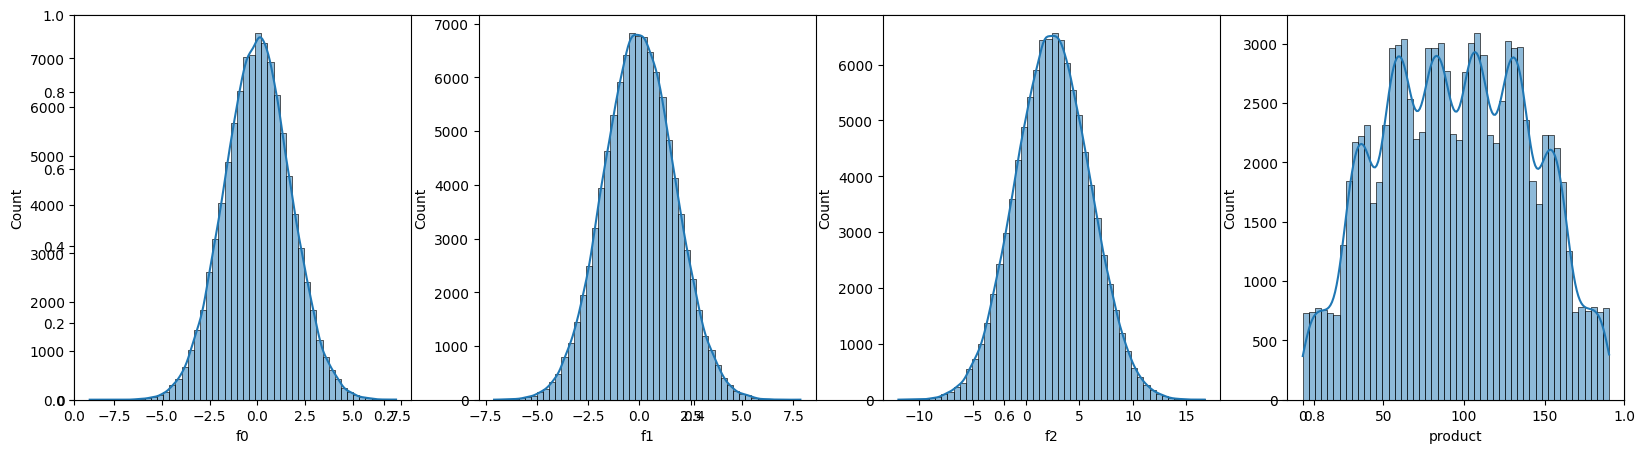

In [401]:
plt.subplots(figsize=(20, 5))

for i in range(len(region_3_columns)):
    sns.histplot(data=region_3, x=region_3_columns[i], ax=plt.subplot(1, len(region_3_columns), i+1), bins=50, kde=True,)
    #plt.xticks(rotation=45)

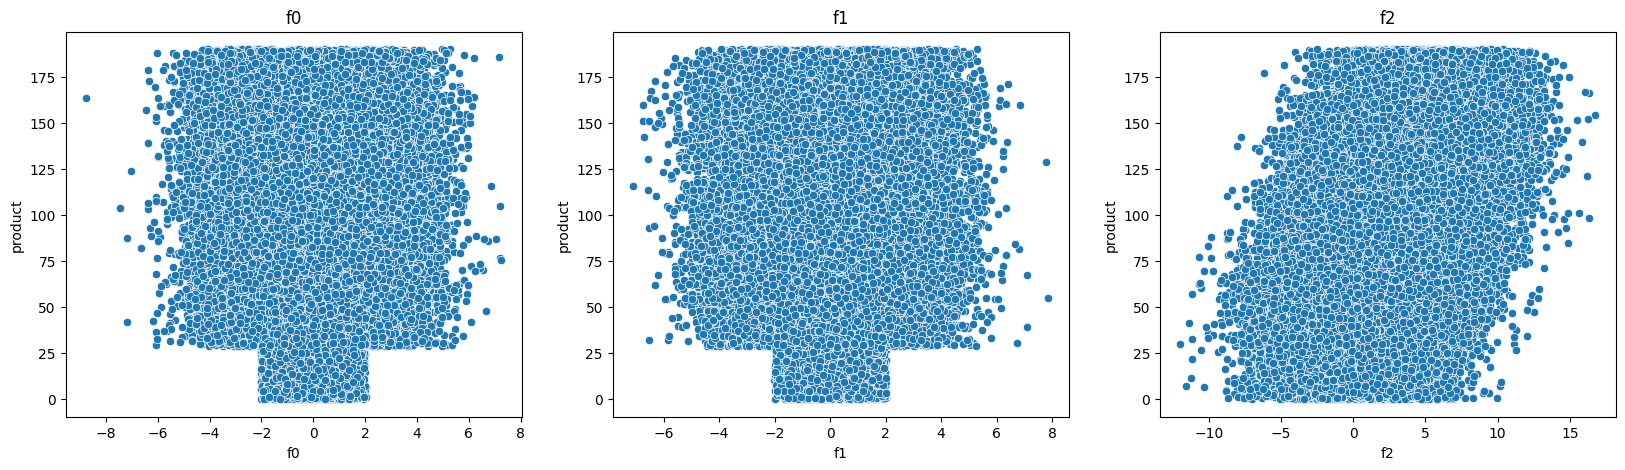

In [402]:
fig, ax = plt.subplots(1, len(region_3_columns)-1, figsize=(20, 5))

for col, axis in zip(region_3_columns[:-1], ax):
    sns.scatterplot(x=region_3[col], y=region_3[region_3_columns[-1]], ax=axis)
    axis.set_title(col)

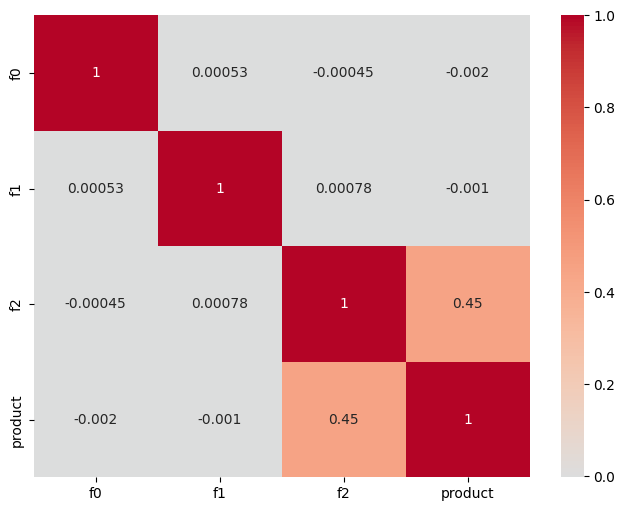

In [403]:
corr_3 = region_3[region_3_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_3, annot=True, cmap="coolwarm", center=0)
plt.show()

In [351]:
model = LinearRegression()

#### Regresion lineal para la region 1

In [352]:
region_1.drop(columns=['id'], inplace=True)

In [353]:
target_region_1 = region_1['product']
features_region_1 = region_1.drop(['product'], axis=1)

In [354]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(features_region_1, target_region_1, test_size=0.25)

In [355]:
model.fit(x_train_1, y_train_1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [356]:
model.score(x_train_1, y_train_1)

0.27540491097863373

In [357]:
model.score(x_test_1, y_test_1)

0.27659587572534394

In [358]:
region_1_predictions = model.predict(x_test_1)

In [359]:
region_1_results = pd.DataFrame({'real_value': y_test_1, 'predict_value': region_1_predictions})
print(region_1_results.head(10))

       real_value  predict_value
92637  124.225508      89.801522
85142   65.221746     118.818217
88013   25.847532      64.293909
17828  158.484715     130.737365
29706  135.013442     145.215694
8358   163.650119     114.190181
71094   55.691762      97.602653
96294  103.193755      80.626807
11730   48.214860      85.093612
75089  112.540365     134.322686


In [360]:
#Volumen medio predicho
media_region_1 = region_1_results['predict_value'].mean()
print(f"Volumen medio de reservas predicho: {media_region_1:,.2f}")

Volumen medio de reservas predicho: 92.62


In [361]:
#Ganancia media por pozo
ganancia_por_unidad = 4500
print(f"La ganancia media por pozo de la region 1 es de: {media_region_1*ganancia_por_unidad:,.2f}")

La ganancia media por pozo de la region 1 es de: 416,772.16


In [362]:
#RSME
region_1_rmse = root_mean_squared_error(y_test_1, region_1_results['predict_value'])
print(f'RSME: {region_1_rmse}')

RSME: 37.81595071135611


#### Regresion lineal para la region 2

In [363]:
region_2.drop(columns=['id'], inplace=True)

In [364]:
target_region_2 = region_2['product']
features_region_2 = region_2.drop(['product'], axis=1)

In [365]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(features_region_2, target_region_2, test_size=0.25)

In [366]:
model.fit(x_train_2, y_train_2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [367]:
region_2_predictions = model.predict(x_test_2)

In [368]:
region_2_results = pd.DataFrame({'real_value': y_test_2, 'predict_value': region_2_predictions})
print(region_2_results.head(10))

       real_value  predict_value
90933  134.766305     135.862538
36652    0.000000       1.125441
52746    3.179103       2.975568
32179  110.992147     110.871425
85486   80.859783      81.947409
16545    3.179103       3.926256
29345   26.953261      27.052722
84259   80.859783      80.236382
84316   84.038886      82.589969
23456   30.132364      29.292285


In [369]:
#Volumen medio predicho
media_region_2 = region_2_results['predict_value'].mean()
print(f"Volumen medio de reservas predicho: {media_region_2:,.2f}")

Volumen medio de reservas predicho: 68.64


In [370]:
#Ganancia media por pozo
ganancia_por_unidad = 4500
print(f"La ganancia media por pozo de la region 1 es de: {media_region_2*ganancia_por_unidad:,.2f}")

La ganancia media por pozo de la region 1 es de: 308,885.15


In [371]:
#RSME
region_2_rmse = root_mean_squared_error(y_test_2, region_2_results['predict_value'])
print(f'RSME: {region_2_rmse}')

RSME: 0.8910525882959625


#### Regresion lineal para la region 3

In [372]:
region_3.drop(columns=['id'], inplace=True)

In [373]:
target_region_3 = region_3['product']
features_region_3 = region_3.drop(['product'], axis=1)

In [374]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(features_region_3, target_region_3, test_size=0.25)

In [375]:
model.fit(x_train_3, y_train_3)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [376]:
region_3_predictions = model.predict(x_test_3)

In [377]:
region_3_results = pd.DataFrame({'real_value': y_test_3, 'predict_value': region_3_predictions})
print(region_3_results.head(10))

       real_value  predict_value
65904    0.232980      40.766643
69013   27.249573      74.207940
55363   85.998295      77.029118
13634    3.062430      73.110056
73116  141.633305     123.577302
77653   33.721733      67.467663
68176   40.245213      69.576856
35395   56.466086      82.442323
43271   55.560689      79.495578
98105  161.063291     107.030738


In [378]:
#Volumen medio predicho
media_region_3 = region_3_results['predict_value'].mean()
print(f"Volumen medio de reservas predicho: {media_region_3:,.2f}")

Volumen medio de reservas predicho: 94.97


In [379]:
#Ganancia media por pozo
ganancia_por_unidad = 4500
print(f"La ganancia media por pozo de la region 1 es de: {media_region_3*ganancia_por_unidad:,.2f}")

La ganancia media por pozo de la region 1 es de: 427,377.18


In [380]:
#RSME
region_3_rmse = root_mean_squared_error(y_test_3, region_3_results['predict_value'])
print(f'RSME: {region_3_rmse}')

RSME: 40.075708216181766


#### Condiciones

In [381]:
#Condiciones iniciales

presupuesto = 100_000_000
pozos = 200
ganancia_por_unidad = 4500

presupuesto / pozos

500000.0

In [382]:
unidades_min = presupuesto / ganancia_por_unidad
barriles_por_unidad = 1000

print(f"El volumen minimo para no perder dinero es de: {unidades_min:,.2f} unidades o {unidades_min*barriles_por_unidad:,.2f} barriles")

El volumen minimo para no perder dinero es de: 22,222.22 unidades o 22,222,222.22 barriles


In [383]:
numero_min_por_pozo = unidades_min / pozos
print(f"El volumen minimo por pozo para no perder dinero es de: {numero_min_por_pozo:,.2f} unidades o {numero_min_por_pozo*barriles_por_unidad:,.2f} barriles")

El volumen minimo por pozo para no perder dinero es de: 111.11 unidades o 111,111.11 barriles


In [384]:
def ganancia_200_pozos(datos):
    mejores_pozos = datos.sort_values(by='predict_value', ascending=False)['real_value'].head(200)
    volumen = mejores_pozos.sum()
    margen = volumen * ganancia_por_unidad - presupuesto
    return margen

In [385]:
def estres(datos, n_muestras):

    margen_muestras = []

    for i in range(n_muestras):
        submuestra = datos.sample(500, replace=True)
        margen_muestras.append(ganancia_200_pozos(submuestra))
        
    return pd.Series(margen_muestras)

#### Analisis de negocio para la region 1

In [386]:
print(f"La ganancia potencial para la region 1 es de {ganancia_200_pozos(region_1_results):,.2f}")

La ganancia potencial para la region 1 es de 33,589,894.47


In [387]:
resultado_region_1 = estres(region_1_results, 1000)
lower_region_1 = resultado_region_1.quantile(0.05)
upper_region_1 = resultado_region_1.quantile(0.95)

In [388]:
print(f"Ganancia media region 1: {resultado_region_1.mean():,.2f}")
print(lower_region_1)
print(upper_region_1)

Ganancia media region 1: 4,476,372.46
241678.80983174153
8683531.951880721


In [389]:
print(f"Perdida media: {(resultado_region_1 < 0).mean()}")

Perdida media: 0.035


In [390]:
print("Perdidas totales", (resultado_region_1 < 0).sum())

Perdidas totales 35


#### Analisis de negocio para la region 2

In [391]:
print(f"La ganancia potencial para la region 2 es de {ganancia_200_pozos(region_2_results):,.2f}")

La ganancia potencial para la region 2 es de 24,150,866.97


In [392]:
resultado_region_2 = estres(region_2_results, 1000)
lower_region_2 = resultado_region_2.quantile(0.05)
upper_region_2 = resultado_region_2.quantile(0.95)

In [393]:
print(f"Ganancia media region 2: {resultado_region_2.mean():,.2f}")
print(lower_region_2)
print(upper_region_2)

Ganancia media region 2: 4,359,201.63
959907.9762794666
7695061.409312604


In [394]:
print(f"Perdida media: {(resultado_region_2 < 0).mean()}")

Perdida media: 0.016


In [395]:
print("Perdidas totales", (resultado_region_2 < 0).sum())

Perdidas totales 16


#### Analisis de negocio para la region 3

In [396]:
print(f"La ganancia potencial para la region 3 es de {ganancia_200_pozos(region_3_results):,.2f}")

La ganancia potencial para la region 3 es de 26,504,890.99


In [397]:
resultado_region_3 = estres(region_3_results, 1000)
lower_region_3 = resultado_region_3.quantile(0.05)
upper_region_3 = resultado_region_3.quantile(0.95)

In [398]:
print(f"Ganancia media region 3: {resultado_region_3.mean():,.2f}")
print(lower_region_3)
print(upper_region_3)

Ganancia media region 3: 3,477,729.27
-1142917.1228782362
7937013.9764663


In [399]:
print(f"Perdida media: {(resultado_region_3 < 0).mean()}")

Perdida media: 0.107


In [400]:
print("Perdidas totales", (resultado_region_3 < 0).sum())

Perdidas totales 107


Conclusion: Recomiendo la region 2 para desarrollar los pozos dado a su mayor ganancia y menor riesgo.